In [1]:
import sys
PATH = "C:/Data/Antonio/software/LCOS/LCOS_CompleteLV/python"
if PATH not in sys.path:
    sys.path.insert(0, PATH)

In [11]:
import yaml
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
with open('pattern_definition.yaml') as f:
    stream = f.read()

In [25]:
len(stream)

390

In [4]:
params = yaml.load(stream)
params['Xm']  = np.array(params.pop('Xm_string'))
params['Ym']  = np.array(params.pop('Ym_string'))
params

{'PhWrap': True,
 'Xm': array([  21.72,   44.87,   68.2 ,   91.45,  114.72,  137.87,  160.97,
         184.04]),
 'Ym': array([ 13.84,  23.78,  13.79,  13.83,  13.75,  13.79,  13.74,  13.68]),
 'center_spot': 4,
 'dark_all': False,
 'darken_cspot': True,
 'debug': True,
 'f': 0.032,
 'lw': 1,
 'nospot': False,
 'pad': 0,
 'phase_factor': 56,
 'phi_max': 4.0,
 'steer_horiz': True,
 'vmax': 60,
 'wl': 6.28e-07}

In [5]:
for k in params.keys():
    print(k, end=', ')

nospot, center_spot, darken_cspot, f, lw, dark_all, Ym, phi_max, wl, PhWrap, Xm, steer_horiz, debug, phase_factor, pad, vmax, 

In [6]:
from patternlib_simple2 import get_spot_pattern

In [29]:
'ok'.encode()

b'ok'

In [28]:
def process_recv_data(data):
    print(data)
    return 'OK'

In [26]:
import socketserver

class MyTCPHandler(socketserver.BaseRequestHandler):

    def handle(self):
        # self.request is the TCP socket connected to the client
        self.data = self.request.recv(1024).strip()
        print("- Data received.")
        response = process_recv_data(self.data)
        self.request.sendall(response)

def run_pattern_server():
    HOST, PORT = "localhost", 9999
    server = socketserver.TCPServer((HOST, PORT), MyTCPHandler)
    print('Serving...')
    server.serve_forever()

In [9]:
a = pattern_yaml(**params)

In [39]:
a.dtype

dtype('uint8')

In [36]:
b = a.tobytes()

In [38]:
len(b)

600.0

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


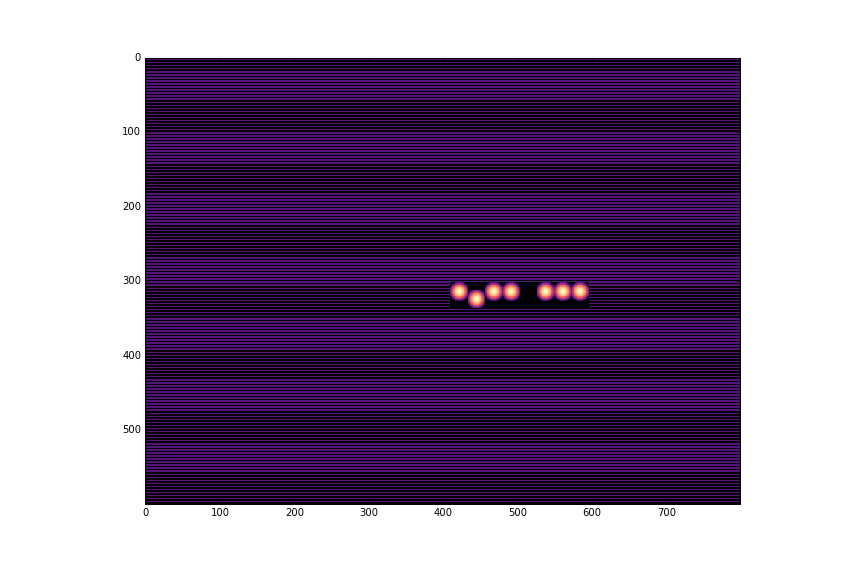

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.imshow(a, interpolation='none', cmap='magma')

In [ ]:
def pattern_wrapper(Xm, Ym, f, wl, phi_max, phase_factor, center_spot,
                    darken_cspot, lw, vmax, ph_wrapping, pad, dark_all,
                    nospot, steer_horiz, debug=False):
    """
    Wrapper function to generate the pattern using input parameters from LV.

    Parameters:
    `Xm`, `Ym`: 2D arrays of spot centers
    `f`: (float) focal length of generated lenses (m)
    `wl`: (float)wavelength of laser (m)
    `phi_max`: (float) constant phase to add to the pattern (in pi units)
    `phase_factor`: (uint8) the 8-bit value (grey scale) corresponding to pi
    `center_spot`: spot number considered as center
    `darken_cspot`: (bool) if True darken the center spot
    `lw`: (uint) line-width of the steering pattern
    `vmax` (uint8) max value for the steering pattern (min value is 0)
    `ph_wrapping`: (uint8) if "true" wraps all the phase values < 0 to 0..2pi
    `pad`: (uint) #pixels of padding for the lens pattern
    `dark_all` (uint8) if "true" return an array of zeros
    `nospot` (uint8) if "true" return only the steering pattern
    """
    if lw < 0: # avoids divisions by zero
        lw = 1
        vmax = 0

    Xm, Ym = np.array(Xm), np.array(Ym)
    lens_params = dict(wl=wl, f=f, phi_max=phi_max, phase_factor=phase_factor,
                       ph_wrapping=bool(ph_wrapping))
    steer_params = dict(vmax=int(vmax), lw=int(lw), horizontal=steer_horiz)

    if debug:
        fprint('')
        fprint_kw(Xm=Xm, Ym=Ym)
        fprint_kw(**lens_params)
        fprint_kw(**steer_params)
        fprint_kw(pad=pad,
                  darken_cspot=darken_cspot, CD=(0, center_spot),
                  dark_all=dark_all, nospot=nospot)
    #a = (np.arange(800*600).reshape(800, 600).T*255./(800*600)).tolist()
    a = get_spot_pattern(Xm, Ym, lens_params, steer_params, pad=pad,
                        darken_cspot=darken_cspot, CD=(0, center_spot),
                        dark_all=dark_all, nospot=nospot, debug=debug)
    a = a.tolist()
    return a

In [15]:
a = pattern_wrapper(**params)

TypeError: pattern_wrapper() got an unexpected keyword argument 'PhWrap'

In [8]:
import patternlib_simple

In [9]:
import numpy as np

In [10]:
pattern = np.linspace(0, 255, 800*600, dtype='uint8').reshape(600, 800)
pattern

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   1,   1,   1],
       ..., 
       [253, 253, 253, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 255]], dtype=uint8)

In [ ]:
pattern.tofile('pattern_800x600_uint8_C_order.bin')